# Úkol 2

## Inflace

V souboru ukol_02_a.csv najdeš procenta lidí, kteří považují inflaci a růst životních nákladů za jeden ze svých nejzávažnějších problémů. Data jsou za dvě období - léto 2022 (sloupec 97) a zima 2022/2023 (sloupec 98). Ověř, zda se procento lidí, kteří řadí inflaci mezi 2 své nejzávažnější problémy, změnilo.

1. Výběr členských států EU a sloučení tabulek

In [45]:
import pandas
from scipy import stats 

EU_countries = pandas.read_csv("countries.csv")
all_countries_a = pandas.read_csv("ukol_02_a.csv")
EU_merged = pandas.merge(EU_countries, all_countries_a, on="Country")
EU_merged

,Country Name,Country,Euro,98,97
0,Belgium,BE,1,31,34
1,Greece,EL,1,27,23
2,Lithuania,LT,1,24,36
3,Portugal,PT,1,26,22
4,Bulgaria,BG,0,22,31
5,Spain,ES,1,33,35
6,Luxembourg,LU,1,37,37
7,Romania,RO,0,30,24
8,Czechia,CZ,0,34,42
9,France,FR,1,31,34


2. Test normality

H0: Data za léto 2022 mají normální rozdělení

H1: Data za léto 2022 nemají normální rozdělení

In [46]:
res_summer_22 = stats.shapiro(EU_merged["97"])
res_summer_22

ShapiroResult(statistic=0.952153205871582, pvalue=0.24169494211673737)

Vzhledem k tomu, že p-hodnota > 0.05, nezamítáme nulovou hypotézu, tj. tvrdíme, že data mají normální rozdělení.

H0: Data za zimu 2022/2023 mají normální rozdělení

H1: Data za zimu 2022/2023 nemají normální rozdělení

In [47]:
res_winter_23 = stats.shapiro(EU_merged["98"])
res_winter_23

ShapiroResult(statistic=0.9399222135543823, pvalue=0.12131019681692123)

Vzhledem k tomu, že i v tomto případě je p-hodnota > 0.05, nezamítáme nulovou hypotézu, tj. tvrdíme, že data mají normální rozdělení.

Vizualizace pomocí grafu funkce hustoty

<AxesSubplot: ylabel='Density'>

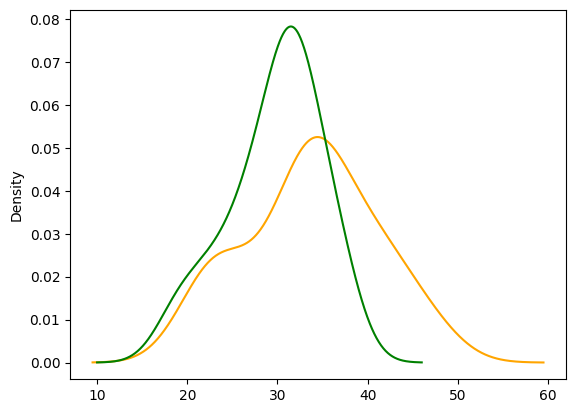

In [48]:
EU_merged["97"].plot.kde(color="orange")
EU_merged["98"].plot.kde(color="green")

3. Formulace hypotéz

H0: Procento lidí, kteří řadí inflaci mezi své dva nejzávažnější problémy, je stejné.

H1: Procento lidí, kteří řadí inflaci mezi své dva nejzávažnější problémy, se změnilo.

4. Výběr vhodného testu

Vzhledem k tomu, že na základě výsledku Shapiro-Wilk testu jsme nezamítli nulovou hypotézu, byť to z vizualizace hustoty jednoznačně nevyplývá, budeme se řídit čísly a pro test vnímání závažnosti inflace u vzorku respondentů použijeme parametrický párový test (t-test párový).

In [49]:
res_inflation = stats.ttest_rel(EU_merged["97"], EU_merged["98"])
res_inflation

TtestResult(statistic=3.4869444202944764, pvalue=0.0017533857526091583, df=26)

5. Závěr

Vzhledem k tomu, že p-hodnota < 0.05, zamítáme nulovou hypotézu, tj. tvrdíme, že procento listí, kteří řadí inflaci mezi své dva nejzávažnější problémy, se ve sledovaných obdobích změnilo. Což ukazuje i průměr za EU, kdy se poměr respondentů, kteří považují inflaci za závažný problém, snížil z necelých 34% dle průzkumu v létě 2022 na necelých 30% v zimě 2022/2023.

In [50]:
EU_merged["97"].mean()

33.74074074074074

In [51]:
EU_merged["98"].mean()

29.703703703703702

## Důvěra ve stát a v EU

Ve výzkumu je dále zkoumáno, jak moc lidé věří své národní vládě a jak moc věří EU. Data jsou v souboru ukol_02_b.csv. Číslo udává procento lidí, kteří dané instituci věří. Ověř, zda existuje korelace mezi procentem lidí, které věří EU v každé ze zemí, a procentem lidí, kteří EU nevěří.

1. Výběr členských států EU a sloučení tabulek

In [52]:
EU_countries = pandas.read_csv("countries.csv")
all_countries_b = pandas.read_csv("ukol_02_b.csv")
EU_merged_b = pandas.merge(EU_countries, all_countries_b, on="Country")
EU_merged_b

,Country Name,Country,Euro,National Government Trust,EU Trust
0,Belgium,BE,1,40,55
1,Greece,EL,1,22,37
2,Lithuania,LT,1,36,69
3,Portugal,PT,1,45,68
4,Bulgaria,BG,0,19,49
5,Spain,ES,1,23,50
6,Luxembourg,LU,1,70,60
7,Romania,RO,0,27,54
8,Czechia,CZ,0,30,43
9,France,FR,1,23,34


2. Test normality

H0: Data týkající se důvěry v národní vlády mají normální rozdělení

H1: Data týkající se důvěry v národní vlády nemají normální rozdělení

In [53]:
res_nat_gov_trust = stats.shapiro(EU_merged_b["National Government Trust"])
res_nat_gov_trust

ShapiroResult(statistic=0.9438267350196838, pvalue=0.15140558779239655)

Vzhledem k tomu, že p-hodnota > 0.05, nezamítáme nulovou hypotézu, tj. tvrdíme, že data mají normální rozdělení.

H0: Data týkající se důvěry v EU mají normální rozdělení

H1: Data týkající se důvěry v EU nemají normální rozdělení

In [54]:
res_EU_trust = stats.shapiro(EU_merged_b["EU Trust"])
res_EU_trust

ShapiroResult(statistic=0.9735807180404663, pvalue=0.6981646418571472)

Vzhledem k tomu, že p-hodnota > 0.05, ani v tomto případě nezamítáme nulovou hypotézu, tj. tvrdíme, že data mají normální rozdělení.

Vizualizace pomocí grafu funkce hustoty

<AxesSubplot: ylabel='Density'>

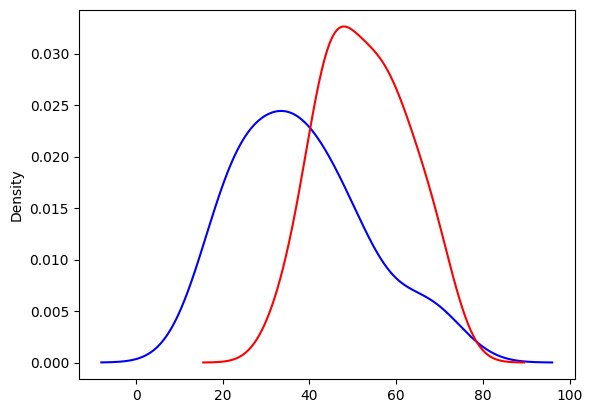

In [55]:
EU_merged_b["National Government Trust"].plot.kde(color="blue")
EU_merged_b["EU Trust"].plot.kde(color="red")

3. Formulace hypotéz

H0: Důvěra respondentů v jejich národní vlády a v EU jsou lineárně nezávislé.

H1: Důvěra respondentů v jejich národní vlády a v EU jsou lineárně závislé.

4. Výběr vhodného testu

S ohledem na skutečnost, že data mají dle testu normální rozdělení, lze pro otestování výše uvedených hypotéz využít test založený na Pearsonově korelačním koeficientu.

In [56]:
res_trust = stats.pearsonr(EU_merged_b["National Government Trust"], EU_merged_b["EU Trust"])
res_trust

PearsonRResult(statistic=0.6097186340024556, pvalue=0.0007345896228823406)

5. Závěr

P-hodnota < 0.05, a proto nulovou hypotézu zamítáme a tvrdíme, že mezi procentem lidí, kteří věří ve své národní vlády a EU, existuje korelace.

## Důvěra v EU a euro

Nakonec si rozdělíme státy EU na dvě skupiny - státy v eurozóně a státy mimo ni. Jak je to s důvěrou v EU? Důvěřují EU více lidé, kteří žijí ve státech platící eurem? Využij znovu data o důvěře v EU ze souboru ukol_02_b.csv a rozděl státy na ty, které jsou v eurozóně, a ty, které jsou mimo ni. Porovnej, jak se liší důvěra v EU v těchto dvou skupinách zemí.

1. Rozdělení států na státy v eurozóně a mimo eurozónu

In [57]:
euro_yes = EU_merged_b[EU_merged_b["Euro"] == 1].reset_index(drop=True)
euro_yes

,Country Name,Country,Euro,National Government Trust,EU Trust
0,Belgium,BE,1,40,55
1,Greece,EL,1,22,37
2,Lithuania,LT,1,36,69
3,Portugal,PT,1,45,68
4,Spain,ES,1,23,50
5,Luxembourg,LU,1,70,60
6,France,FR,1,23,34
7,Slovenia,SI,1,37,44
8,Malta,MT,1,63,71
9,Slovakia,SK,1,18,44


In [58]:
euro_no = EU_merged_b[EU_merged_b["Euro"] == 0].reset_index(drop=True)
euro_no

,Country Name,Country,Euro,National Government Trust,EU Trust
0,Bulgaria,BG,0,19,49
1,Romania,RO,0,27,54
2,Czechia,CZ,0,30,43
3,Hungary,HU,0,48,56
4,Denmark,DK,0,52,65
5,Croatia,HR,0,20,42
6,Estonia,EE,0,39,48
7,Sweden,SE,0,53,61
8,Poland,PL,0,26,64


2. Formulace hypotéz

H0: Důvěra v EU v zemích eurozóny i mimo ni je stejná.

H1: Důvěra v EU v zemích eurozóny i mimo ni je různá.

3. Výběr vhodného testu

Vycházíme z předpokladu ověřeného testem v předchozím příkladě, že rozdělení dat je normální. Použijeme proto test na porovnání průměrů - t-test.

In [59]:
res_trust_euro = stats.ttest_ind(euro_yes["EU Trust"], euro_no["EU Trust"])
res_trust_euro

Ttest_indResult(statistic=-0.33471431258258433, pvalue=0.7406326832748829)

4. Závěr

Vzhledem k tomu, že p-hodnota je větší než hladina významnosti, tj. p > 0.05, nulovou hypotézu, tedy že důvěra v EU v zemích eurozóny i mimo ni je stejná, nezamítáme. Což ilustruje i průměrná úroveň důvěry v EU v obou skupinách, která činí přibližně 52% u obyvatel zemí eurozóny a přibližně 53,5% u obyvatel mimo eurozónu.

In [62]:
euro_yes["EU Trust"].mean()

52.166666666666664

In [61]:
euro_no["EU Trust"].mean()

53.55555555555556